In [2]:
%pylab inline
from __future__ import print_function, division
from statsmodels.kernel_methods import kde, fast_linbin, kde_methods, bandwidths
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
d1 = stats.lognorm(1)
d2 = stats.norm(loc=2, scale=0.3)
d3 = stats.binom(10, .4)

In [4]:
N = 1e4
data = c_[d1.rvs(N), d2.rvs(N), d3.rvs(N)]
data = data[data[:,0] < 10]
data[:10]

array([[ 7.89829735,  2.33269797,  5.        ],
       [ 2.35762676,  2.34101768,  7.        ],
       [ 1.04166852,  1.92837734,  4.        ],
       [ 0.28632605,  1.77330837,  4.        ],
       [ 0.81737377,  1.97378941,  5.        ],
       [ 1.32893033,  2.06105337,  4.        ],
       [ 6.81334467,  1.83410293,  7.        ],
       [ 1.03805143,  1.67211815,  4.        ],
       [ 0.55168689,  2.81682053,  7.        ],
       [ 0.15496126,  1.94051304,  5.        ]])

In [5]:
data.max(axis=0)

array([ 9.94770415,  2.99770531,  9.        ])

In [7]:
k = kde.KDE(data, axis_type='CCU')
k.method.methods[0] = kde_methods.Transform1D(kde_methods.LogTransform)
k.lower = [0, -inf, 0]
est = k.fit()
est.bandwidth, est.total_weights

(array([ 0.17689478,  0.05041391,  0.1       ]), 9886)

In [8]:
est.pdf([[1,2,3],[4,3,2]])

array([  1.03653221e-01,   2.58370058e-05])

In [9]:
%%time
mesh, grid = est.grid(256)
mesh, grid.shape

CPU times: user 788 ms, sys: 350 ms, total: 1.14 s
Wall time: 1.14 s


In [12]:
mesh2, grid2 = fast_linbin.fast_linbin_nd(est.exog, [[0,10],[0,4],[0,10]], [256,128,11], bin_type='BBD')
grid2 /= mesh2.integrate(grid2)
mesh2, grid2.shape

(<Grid 256Bx128Bx11D, [0 - 10 ; 0 - 4 ; 0 - 10], dtype=float64>,
 (256, 128, 11))

/home/barbier/.local/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The shading option was deprecated in version 1.2. Use edgecolors instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


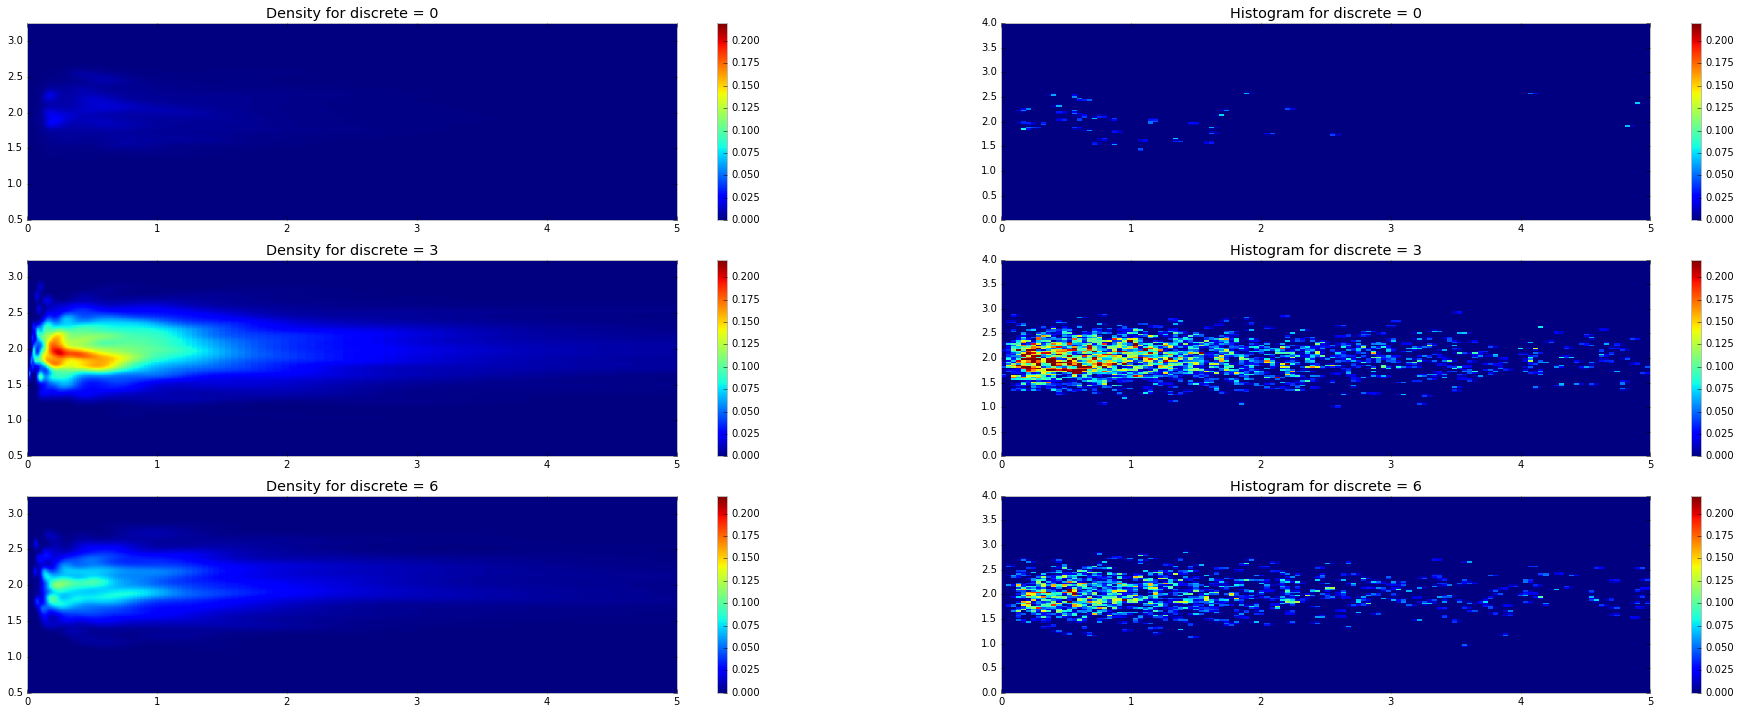

In [13]:
f = figure()
cmax = grid.max()
f.set_size_inches(32,12)
ax1 = f.add_subplot(3,2,1)
pcolor(mesh.edges[0], mesh.edges[1], grid[...,0].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh.bounds[1])
clim(0, cmax)
title('Density for discrete = 0')
ax1 = f.add_subplot(3,2,3)
pcolor(mesh.edges[0], mesh.edges[1], grid[...,3].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh.bounds[1])
clim(0, cmax)
title('Density for discrete = 3')
ax1 = f.add_subplot(3,2,5)
pcolor(mesh.edges[0], mesh.edges[1], grid[...,6].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh.bounds[1])
clim(0, cmax)
title('Density for discrete = 6')

ax1 = f.add_subplot(3,2,2)
pcolor(mesh2.edges[0], mesh2.edges[1], grid2[...,0].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh2.bounds[1])
clim(0, cmax)
title('Histogram for discrete = 0')
ax1 = f.add_subplot(3,2,4)
pcolormesh(mesh2.edges[0], mesh2.edges[1], grid2[...,3].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh2.bounds[1])
clim(0, cmax)
title('Histogram for discrete = 3')
ax1 = f.add_subplot(3,2,6)
pcolormesh(mesh2.edges[0], mesh2.edges[1], grid2[...,6].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh2.bounds[1])
clim(0, cmax)
title('Histogram for discrete = 6')


In [24]:
k.bandwidth = bandwidths.crossvalidation(use_grid=True, grid_size=256, folding=10)

In [25]:
%%time
est1 = k.fit()

CPU times: user 11min 57s, sys: 272 ms, total: 11min 57s
Wall time: 11min 58s


We expect the default to be close to the optimum, as the distributions are normal!

In [26]:
est1.bandwidth

array([ 0.28928212,  0.11011847,  0.01156828])

In [23]:
%%time
k.bandwidth = bandwidths.crossvalidation(use_grid=True, grid_size=256, folding=10, initial_method=[.1, .06, .001])
est1_ = k.fit()
est1_.bandwidth

CPU times: user 16min 13s, sys: 7.26 s, total: 16min 21s
Wall time: 16min 21s


In [ ]:
est1_.bandwidth, est.bandwidth

In [ ]:
%%time
mesh1, grid1 = est1.grid(256)
mesh1, grid1.shape

In [ ]:
f = figure()
cmax = grid1.max()
f.set_size_inches(32,12)
ax1 = f.add_subplot(3,2,1)
pcolor(mesh1.edges[0], mesh1.edges[1], grid1[...,0].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh1.bounds[1])
clim(0, cmax)
title('Density for discrete = 0')
ax1 = f.add_subplot(3,2,3)
pcolor(mesh1.edges[0], mesh1.edges[1], grid1[...,3].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh1.bounds[1])
clim(0, cmax)
title('Density for discrete = 3')
ax1 = f.add_subplot(3,2,5)
pcolor(mesh1.edges[0], mesh1.edges[1], grid1[...,6].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh1.bounds[1])
clim(0, cmax)
title('Density for discrete = 6')

ax1 = f.add_subplot(3,2,2)
pcolor(mesh2.edges[0], mesh2.edges[1], grid2[...,0].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh2.bounds[1])
clim(0, cmax)
title('Histogram for discrete = 0')
ax1 = f.add_subplot(3,2,4)
pcolormesh(mesh2.edges[0], mesh2.edges[1], grid2[...,3].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh2.bounds[1])
clim(0, cmax)
title('Histogram for discrete = 3')
ax1 = f.add_subplot(3,2,6)
pcolormesh(mesh2.edges[0], mesh2.edges[1], grid2[...,6].T, cmap=cm.jet, shading='flat')
colorbar()
xlim(0, 5)
ylim(*mesh2.bounds[1])
clim(0, cmax)
title('Histogram for discrete = 6')
